In [1]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import mplfinance as mpl
import os

In [2]:
api_key = os.environ.get("api_key")
api_secret = os.environ.get("api_secret")

In [3]:
client = Client(api_key, api_secret)

In [4]:
tickers = client.get_all_tickers()

In [5]:
#tickers()

In [6]:
#tickers[1]['price']


In [7]:
ticker_df = pd.DataFrame(tickers)

In [8]:
#ticker_df.head()

In [9]:
#ticker_df.tail()

In [10]:
ticker_df.set_index('symbol', inplace=True)

In [11]:
float(ticker_df.loc['ETHUSDC']['price'])
float(ticker_df.loc['BTCUSDT']['price'])

53886.6

In [12]:
# Get Depth
depth = client.get_order_book(symbol='BTCUSDT')

In [13]:
# depth

In [14]:
depth_df = pd.DataFrame(depth['asks'])
depth_df.columns = ['Price', 'Volume']
depth_df.head()

,Price,Volume
0,53889.33000000,0.00001000
1,53892.64000000,0.00155000
2,53893.29000000,0.01404000
3,53893.30000000,0.02000000
4,53894.00000000,0.02000000


In [15]:
depth_df.dtypes

Price     object
Volume    object
dtype: object

In [16]:
# client.get_historical_klines()

In [17]:
# BTC Minute Data from past day
historical_df = client.get_historical_klines('BTCUSDC', Client.KLINE_INTERVAL_1MINUTE, '1 day ago UTC')

In [18]:
hist_df = pd.DataFrame(historical_df)

In [19]:
# Function to get list of OHLCV Values
#def getminutedata(symbol, interval, lookback)

In [20]:
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1633580640000,55135.39000000,55145.40000000,55058.06000000,55107.97000000,0.66127000,1633580699999,36438.03356830,29,0.33389000,18397.71675870,0
1,1633580700000,55079.62000000,55085.68000000,55034.44000000,55046.27000000,1.98887000,1633580759999,109497.34807940,31,0.10976000,6043.61351950,0
2,1633580760000,55080.92000000,55099.14000000,55045.42000000,55045.42000000,1.67267000,1633580819999,92135.48743650,30,1.18613000,65344.44486620,0
3,1633580820000,55050.72000000,55092.14000000,55043.52000000,55071.16000000,1.96502000,1633580879999,108230.49769910,24,1.83514000,101077.37665760,0
4,1633580880000,55085.88000000,55128.59000000,55080.30000000,55119.83000000,0.29728000,1633580939999,16384.92215900,19,0.25594000,14106.73122970,0


In [21]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [22]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1435,1633666740000,53853.06000000,53853.06000000,53823.05000000,53823.05000000,0.05236000,1633666799999,2818.76340720,8,0.01510000,813.04375740,0
1436,1633666800000,53804.57000000,53819.10000000,53797.93000000,53797.93000000,0.27197000,1633666859999,14631.78852310,16,0.27141000,14601.65950390,0
1437,1633666860000,53825.88000000,53845.59000000,53823.87000000,53823.87000000,0.07779000,1633666919999,4188.38722050,5,0.01300000,699.73644000,0
1438,1633666920000,53855.50000000,53871.24000000,53838.25000000,53865.82000000,0.04116000,1633666979999,2216.44392340,9,0.00752000,404.94142920,0
1439,1633666980000,53904.41000000,53904.41000000,53886.88000000,53886.88000000,0.00414000,1633667039999,223.12797030,2,0.00000000,0.00000000,0


In [23]:
hist_df.shape

(1440, 12)

In [24]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [25]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [26]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [27]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [28]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1435,2021-10-08 04:19:00,53853.06,53853.06,53823.05,53823.05,0.05236,2021-10-08 04:19:59.999000064,2818.763407,8,0.01510,813.043757,0
1436,2021-10-08 04:20:00,53804.57,53819.10,53797.93,53797.93,0.27197,2021-10-08 04:20:59.999000064,14631.788523,16,0.27141,14601.659504,0
1437,2021-10-08 04:21:00,53825.88,53845.59,53823.87,53823.87,0.07779,2021-10-08 04:21:59.999000064,4188.387220,5,0.01300,699.736440,0
1438,2021-10-08 04:22:00,53855.50,53871.24,53838.25,53865.82,0.04116,2021-10-08 04:22:59.999000064,2216.443923,9,0.00752,404.941429,0
1439,2021-10-08 04:23:00,53904.41,53904.41,53886.88,53886.88,0.00414,2021-10-08 04:23:59.999000064,223.127970,2,0.00000,0.000000,0


In [29]:
hist_df.dtypes


Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [30]:
hist_df.describe()


,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1.440000e+03,1440.000000,1440.000000,1440.000000
mean,54197.852847,54224.925840,54169.466410,54197.156438,0.832668,4.512925e+04,29.041667,0.392833,21291.160578
std,320.170355,319.238418,322.213425,320.077267,1.498613,8.130308e+04,31.032493,0.710006,38445.594272
min,53485.140000,53603.660000,53392.380000,53471.300000,0.003520,1.901488e+02,1.000000,0.000000,0.000000
25%,53957.910000,53985.142500,53930.272500,53957.777500,0.157365,8.515107e+03,12.000000,0.048635,2632.283338
50%,54139.375000,54167.460000,54110.210000,54139.295000,0.374125,2.033579e+04,20.000000,0.154690,8401.108950
75%,54360.240000,54401.485000,54333.925000,54364.685000,0.878517,4.757910e+04,34.000000,0.422957,22955.829930
max,55248.220000,55248.220000,55201.450000,55247.090000,24.490710,1.341932e+06,370.000000,7.634250,413119.352100


In [31]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           1440 non-null   datetime64[ns]
 1   Open                1440 non-null   float64       
 2   High                1440 non-null   float64       
 3   Low                 1440 non-null   float64       
 4   Close               1440 non-null   float64       
 5   Volume              1440 non-null   float64       
 6   Close Time          1440 non-null   datetime64[ns]
 7   Quote Asset Volume  1440 non-null   float64       
 8   Number of Trades    1440 non-null   int64         
 9   TB Base Volume      1440 non-null   float64       
 10  TB Quote Volume     1440 non-null   float64       
 11  Ignore              1440 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 135.1+ KB


In [32]:
# Technical Analysis
import mplfinance as mpf

In [33]:
hist_df.set_index('Close Time').tail(100)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2021-10-08 02:44:59.999000064,2021-10-08 02:44:00,53927.19,53957.23,53927.19,53957.23,0.06104,3293.021667,6,0.01890,1019.441615,0
2021-10-08 02:45:59.999000064,2021-10-08 02:45:00,53957.38,53996.08,53957.24,53996.08,0.24474,13213.427235,14,0.00903,487.276996,0
2021-10-08 02:46:59.999000064,2021-10-08 02:46:00,53977.12,54019.78,53977.12,54018.28,0.04700,2537.978508,15,0.01543,833.361706,0
2021-10-08 02:47:59.999000064,2021-10-08 02:47:00,54020.66,54044.47,54003.32,54017.28,0.50973,27539.505497,26,0.16770,9061.617520,0
2021-10-08 02:48:59.999000064,2021-10-08 02:48:00,54008.28,54054.26,53988.27,54054.26,0.58406,31558.837422,30,0.41754,22561.807771,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-08 04:19:59.999000064,2021-10-08 04:19:00,53853.06,53853.06,53823.05,53823.05,0.05236,2818.763407,8,0.01510,813.043757,0
2021-10-08 04:20:59.999000064,2021-10-08 04:20:00,53804.57,53819.10,53797.93,53797.93,0.27197,14631.788523,16,0.27141,14601.659504,0
2021-10-08 04:21:59.999000064,2021-10-08 04:21:00,53825.88,53845.59,53823.87,53823.87,0.07779,4188.387220,5,0.01300,699.736440,0


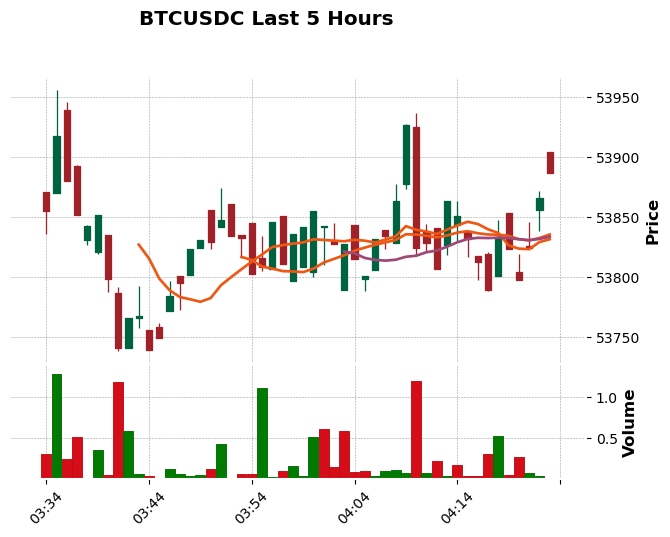

In [34]:
mpf.plot(hist_df.set_index('Close Time').tail(50), 
        type='candle', style='charles', 
        volume=True, 
        title='BTCUSDC Last 5 Hours', 
        mav=(10,20,30))

In [35]:
# Daily Data from 2021 
btc_daily_data = client.get_historical_klines('BTCUSDC', Client.KLINE_INTERVAL_1DAY, '1 Jan 2021')

In [36]:
btc_daily_df = pd.DataFrame(btc_daily_data)

In [37]:
btc_daily_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [38]:
btc_daily_df['Open Time'] = pd.to_datetime(btc_daily_df['Open Time']/1000, unit='s')
btc_daily_df['Close Time'] = pd.to_datetime(btc_daily_df['Close Time']/1000, unit='s')

In [39]:
numeric_columns_d = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [40]:
btc_daily_df[numeric_columns] = btc_daily_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [41]:
btc_daily_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,281.000000,281.000000,281.000000,281.000000,281.000000,2.810000e+02,281.000000,281.000000,2.810000e+02
mean,44652.599573,46193.410107,42925.770747,44740.201673,2752.085836,1.180412e+08,57165.291815,1348.068094,5.782466e+07
std,9044.379069,9124.169866,8981.898044,9012.346854,1529.895184,5.837914e+07,24354.491089,765.668911,2.947372e+07
min,28964.540000,29680.000000,28000.000000,29407.930000,119.739490,6.469134e+06,4302.000000,62.744250,3.388559e+06
25%,35928.270000,37920.310000,34375.420000,35991.670000,1840.435567,8.384192e+07,43355.000000,880.358958,4.007128e+07
50%,45178.970000,46900.000000,43762.790000,45215.210000,2377.183358,1.081952e+08,51968.000000,1170.465357,5.207091e+07
75%,51581.010000,53529.370000,49318.790000,51736.970000,3248.982775,1.375055e+08,66729.000000,1595.493114,6.843147e+07
max,63583.850000,64882.470000,62032.950000,63554.560000,13553.429477,5.128652e+08,226279.000000,6347.727851,2.410801e+08


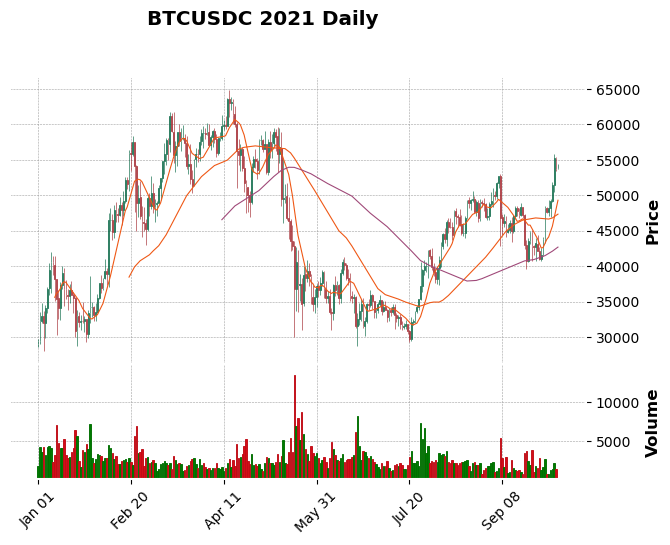

In [42]:
mpf.plot(btc_daily_df.set_index('Close Time').tail(284), 
        type='candle', style='charles', 
        volume=True, 
        title='BTCUSDC 2021 Daily ', 
        mav=(10,50,100))

In [43]:
# Save to csv files
# btc_daily_df.columns

In [54]:
# Just get the Open Time, Open, High, Low, Close, Volume
btc_ohlcv_daily = btc_daily_df.iloc[:,0:6]
btc_ohlcv_minute = hist_df.iloc[:,0:6]

In [55]:
btc_ohlcv_daily = btc_ohlcv_daily.set_index('Open Time')
btc_ohlcv_minute = btc_ohlcv_minute.set_index('Open Time')

In [56]:
# Display of Daily Bitcoin DF to use for TA and Machine Leaning
btc_ohlcv_daily

,Open,High,Low,Close,Volume
Open Time,,,,,
2021-01-01,28964.54,29680.00,28608.73,29407.93,1736.620480
2021-01-02,29393.99,33500.00,29027.03,32215.18,4227.234681
2021-01-03,32216.13,34851.30,32002.65,33033.26,3523.881120
2021-01-04,33040.00,33648.27,28000.00,32017.58,4218.572357
2021-01-05,32027.11,34498.00,29882.30,34059.70,3150.244271
...,...,...,...,...,...
2021-10-04,48214.74,49507.80,46933.60,49247.63,1283.577550
2021-10-05,49252.59,51921.46,49057.36,51488.94,1382.533040
2021-10-06,51502.83,55794.07,50408.96,55330.92,2133.377701


In [57]:
# Display of Daily Bitcoin DF to use for TA and Machine Leaning
btc_ohlcv_minute

,Open,High,Low,Close,Volume
Open Time,,,,,
2021-10-07 04:24:00,55135.39,55145.40,55058.06,55107.97,0.66127
2021-10-07 04:25:00,55079.62,55085.68,55034.44,55046.27,1.98887
2021-10-07 04:26:00,55080.92,55099.14,55045.42,55045.42,1.67267
2021-10-07 04:27:00,55050.72,55092.14,55043.52,55071.16,1.96502
2021-10-07 04:28:00,55085.88,55128.59,55080.30,55119.83,0.29728
...,...,...,...,...,...
2021-10-08 04:19:00,53853.06,53853.06,53823.05,53823.05,0.05236
2021-10-08 04:20:00,53804.57,53819.10,53797.93,53797.93,0.27197
2021-10-08 04:21:00,53825.88,53845.59,53823.87,53823.87,0.07779


In [ ]:
# CSV SAVER TOOL For Saving Bitcoin data to CSVs to use for Logisitc Regression model
# btc_ohlcv_daily.to_csv('daily_btc_ohclv_2021', index=False)
# btc_ohlcv_minute.to_csv('minute_btc_ohclv_5th_6th', index=False)

In [ ]:
pip install --upgrade ta

In [ ]:
pip install pandas_ta

In [58]:
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna
import pandas_ta as ta
from finta import TA

In [ ]:
# Momentum indicator

In [61]:
btc_ohlcv_daily["actual returns"] = btc_ohlcv_daily["Close"].pct_change()
btc_ohlcv_daily.dropna()

,Open,High,Low,Close,Volume,actual returns
Open Time,,,,,,
2021-01-02,29393.99,33500.00,29027.03,32215.18,4227.234681,0.095459
2021-01-03,32216.13,34851.30,32002.65,33033.26,3523.881120,0.025394
2021-01-04,33040.00,33648.27,28000.00,32017.58,4218.572357,-0.030747
2021-01-05,32027.11,34498.00,29882.30,34059.70,3150.244271,0.063781
2021-01-06,34057.84,37000.00,33343.24,36834.77,4168.293259,0.081477
...,...,...,...,...,...,...
2021-10-04,48214.74,49507.80,46933.60,49247.63,1283.577550,0.021311
2021-10-05,49252.59,51921.46,49057.36,51488.94,1382.533040,0.045511
2021-10-06,51502.83,55794.07,50408.96,55330.92,2133.377701,0.074618


In [65]:
# Simple Moving Average(SMA) short_window = 5, long window = 50
btc_ohlcv_daily['sma5'] = ta.sma(btc_ohlcv_daily["Close"], length=5)
btc_ohlcv_daily['sma50'] = ta.sma(btc_ohlcv_daily["Close"], length=5)

In [67]:
# Initialize a 'Signal' Column
btc_ohlcv_daily['signal'] = 0.0

In [75]:
btc_ohlcv_daily.dropna()

,Open,High,Low,Close,Volume,actual returns,sma5,sma50,signal
Open Time,,,,,,,,,
2021-01-05,32027.11,34498.00,29882.30,34059.70,3150.244271,0.063781,32146.730,32146.730,1.0
2021-01-06,34057.84,37000.00,33343.24,36834.77,4168.293259,0.081477,33632.098,33632.098,1.0
2021-01-07,36859.03,40390.98,36005.00,39494.85,4330.386536,0.072217,35088.032,35088.032,1.0
2021-01-08,39504.38,42037.99,36286.12,40622.89,4042.516723,0.028562,36605.958,36605.958,1.0
2021-01-09,40645.36,41422.59,38717.42,40238.43,2235.391656,-0.009464,38250.128,38250.128,-1.0
...,...,...,...,...,...,...,...,...,...
2021-10-04,48214.74,49507.80,46933.60,49247.63,1283.577550,0.021311,47419.432,47419.432,1.0
2021-10-05,49252.59,51921.46,49057.36,51488.94,1382.533040,0.045511,48955.326,48955.326,1.0
2021-10-06,51502.83,55794.07,50408.96,55330.92,2133.377701,0.074618,50392.034,50392.034,1.0


In [76]:
# Generate signal to buy stock long
btc_ohlcv_daily.loc[(btc_ohlcv_daily['actual returns'] >= 0), 'signal'] = 1

In [77]:
# Generate signal to sell stock short
btc_ohlcv_daily.loc[(btc_ohlcv_daily['actual returns'] < 0), 'signal'] = -1

In [78]:
display(btc_ohlcv_daily.head())
display(btc_ohlcv_daily.tail())

,Open,High,Low,Close,Volume,actual returns,sma5,sma50,signal
Open Time,,,,,,,,,
2021-01-01,28964.54,29680.00,28608.73,29407.93,1736.620480,NaN,NaN,NaN,0.0
2021-01-02,29393.99,33500.00,29027.03,32215.18,4227.234681,0.095459,NaN,NaN,1.0
2021-01-03,32216.13,34851.30,32002.65,33033.26,3523.881120,0.025394,NaN,NaN,1.0
2021-01-04,33040.00,33648.27,28000.00,32017.58,4218.572357,-0.030747,NaN,NaN,-1.0
2021-01-05,32027.11,34498.00,29882.30,34059.70,3150.244271,0.063781,32146.73,32146.73,1.0


,Open,High,Low,Close,Volume,actual returns,sma5,sma50,signal
Open Time,,,,,,,,,
2021-10-04,48214.74,49507.80,46933.60,49247.63,1283.577550,0.021311,47419.432,47419.432,1.0
2021-10-05,49252.59,51921.46,49057.36,51488.94,1382.533040,0.045511,48955.326,48955.326,1.0
2021-10-06,51502.83,55794.07,50408.96,55330.92,2133.377701,0.074618,50392.034,50392.034,1.0
2021-10-07,55332.46,55352.49,53392.38,53767.81,1434.183730,-0.028250,51611.060,51611.060,-1.0
2021-10-08,53788.03,54434.41,53710.80,53886.88,119.739490,0.002215,52744.436,52744.436,1.0


In [73]:
# CSV SAVER TOOL For Saving Bitcoin data to CSVs to use for Logisitc Regression model
# btc_ohlcv_daily.to_csv('daily_btc_ohclv_2021', index=False)
# btc_ohlcv_minute.to_csv('minute_btc_ohclv_5th_6th', index=False)